In [1]:
from once_for_all.evaluation.perf_dataset import PerformanceDataset
from utils.config_utils import get_mfcc_params
import pandas as pd
import numpy as np

import json
import os

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
def create_stats_df(data):
    # Gather initial rows
    df = None
    for k, v in data.items():
        if df is None:
            df = pd.json_normalize(v)
            df = pd.concat([pd.json_normalize(json.loads(k)), df], axis=1)
        else:
            row = pd.json_normalize(v)
            row = pd.concat([pd.json_normalize(json.loads(k)), row], axis=1)
            df = df.append(row)
    
    ks_mean = np.mean(df['ks'].tolist(), axis=1)
    df['ks_mean'] = ks_mean

    e_mean = np.mean(df['e'].tolist(), axis=1)
    df['e_mean'] = e_mean

    d_mean = np.mean(df['d'].tolist(), axis=1)
    df['d_mean'] = d_mean

    df['gpu4lat']= df['net_info.gpu4 latency.hist.sample'].apply(lambda x: x[0][0]/x[0][1])
    df['cpulat']= df['net_info.cpu latency.hist.sample'].apply(lambda x: x[0][0]/x[0][1])

    df['acc_params_ratio'] = df['top1'] / df['net_info.params']
    df['acc_flops_ratio'] = df['top1'] / df['net_info.flops']
    df['acctgpu4lat'] = df['top1'] * df['gpu4lat']
    df['acctcpulat'] = df['top1'] * df['cpulat']
    
    df = df.drop(columns=['net_info.gpu4 latency.val', 'net_info.gpu4 latency.hist.warmup',
                          'net_info.gpu4 latency.hist.sample',
                          'net_info.cpu latency.val', 'net_info.cpu latency.hist.warmup',
                          'net_info.cpu latency.hist.sample'])
    return df

    

In [3]:
ft_extr_type = "mfcc"
params_id = 1

In [4]:
path = "eval/" + ft_extr_type + str(params_id) + "/"

In [5]:
if ft_extr_type == "mfcc":
    n_mfcc_bins, ft_extr_params_list = get_mfcc_params(params_id)
    
performance_dataset = PerformanceDataset(path, use_csv=False)

df = None

for ft_extr_params in ft_extr_params_list:
    data = performance_dataset.load_dataset(ft_extr_params)
    df_ft_extr_p = create_stats_df(data)
    if df is None:
        df = df_ft_extr_p
    else:
        df = pd.concat([df, df_ft_extr_p], axis=0)
    
df

,w,ks,d,e,ft_extr_params,ft_extr_params,data_shape,top1,net_info.params,net_info.flops,ks_mean,e_mean,d_mean,gpu4lat,cpulat,acc_params_ratio,acc_flops_ratio,acctgpu4lat,acctcpulat
0,"[0, 0, 0, 0, 0]","[3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 3, 7, 7, 5, 5, 7]","[1, 4, 1, 2]","[2, 2, 2, 2, 1, 3, 3, 2, 1, 2, 3, 3, 2, 2, 2, 1]","[40, 40]","[40, 40]","[1, 51, 10]",88.112525,147020,5528896.0,4.250,2.0625,2.00,2.463150,4.429007,0.000599,0.000016,217.034369,390.250954
0,"[0, 0, 0, 0, 0]","[3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 3, 7]","[1, 2, 3, 4]","[3, 3, 1, 3, 1, 3, 1, 1, 1, 2, 3, 3, 3, 2, 2, 2]","[40, 40]","[40, 40]","[1, 51, 10]",87.862975,209612,5873024.0,4.000,2.1250,2.50,2.592206,3.820729,0.000419,0.000015,227.758931,335.700639
0,"[0, 0, 0, 0, 0]","[3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 3, 3, 3, 3, 7, 5]","[3, 4, 1, 4]","[1, 3, 3, 1, 2, 3, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3]","[40, 40]","[40, 40]","[1, 51, 10]",89.972775,242572,12158080.0,3.875,2.0000,3.00,3.450441,5.038357,0.000371,0.000007,310.445785,453.314942
0,"[0, 0, 0, 0, 0]","[3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 7, 3, 5, 3, 5]","[4, 2, 2, 2]","[3, 2, 1, 2, 2, 1, 2, 3, 1, 1, 2, 1, 2, 2, 3, 3]","[40, 40]","[40, 40]","[1, 51, 10]",90.245009,143756,10588480.0,4.000,1.9375,2.50,3.166604,5.496001,0.000628,0.000009,285.770210,495.986681
0,"[0, 0, 0, 0, 0]","[3, 3, 3, 3, 3, 3, 3, 5, 7, 5, 7, 7, 5, 3, 5, 7]","[1, 3, 2, 3]","[2, 1, 1, 2, 1, 2, 3, 1, 1, 3, 3, 1, 3, 2, 1, 1]","[40, 40]","[40, 40]","[1, 51, 10]",88.770416,162508,5018240.0,4.500,1.7500,2.25,2.559304,4.598856,0.000546,0.000018,227.190502,408.242358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[0, 0, 0, 0, 0]","[3, 3, 3, 5, 5, 5, 3, 3, 7, 5, 3, 5, 7, 3, 7, 7]","[3, 2, 3, 3]","[1, 2, 1, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1]","[40, 40]","[40, 40]","[1, 51, 10]",90.426501,193612,7473600.0,4.625,1.8750,2.75,3.395271,5.886817,0.000467,0.000012,307.022504,532.324263
0,"[0, 0, 0, 0, 0]","[3, 3, 3, 5, 5, 5, 3, 5, 7, 5, 3, 3, 3, 7, 3, 5]","[2, 4, 2, 4]","[2, 1, 3, 1, 2, 1, 2, 1, 1, 2, 3, 3, 3, 2, 2, 2]","[40, 40]","[40, 40]","[1, 51, 10]",90.403816,191884,6367872.0,4.250,1.9375,3.00,3.413653,6.637883,0.000471,0.000014,308.607290,600.089967
0,"[0, 0, 0, 0, 0]","[3, 3, 3, 5, 5, 5, 3, 7, 3, 3, 3, 3, 3, 7, 5, 3]","[4, 4, 2, 2]","[2, 1, 3, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 3, 3]","[40, 40]","[40, 40]","[1, 51, 10]",90.108895,189836,12935488.0,4.000,1.8125,3.00,3.642416,6.587243,0.000475,0.000007,328.214083,593.569198
0,"[0, 0, 0, 0, 0]","[3, 3, 3, 5, 5, 5, 3, 7, 3, 3, 7, 7, 5, 3, 5, 3]","[3, 3, 4, 3]","[3, 2, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3]","[40, 40]","[40, 40]","[1, 51, 10]",90.449188,275980,11409472.0,4.375,2.1250,3.25,3.523445,6.699085,0.000328,0.000008,318.692750,605.926817


In [ ]:
df2 = df
df = df2

In [18]:
df['top1'].describe()

count    350.000000
mean      89.696527
std        0.968685
min       86.932848
25%       89.042653
50%       89.813973
75%       90.443516
max       91.719599
Name: top1, dtype: float64

In [69]:
temp = df2.sort_values("acc_params_ratio", ascending=False)
top_n = temp.head(100)
top_n

,w,ks,d,e,ft_extr_params,ft_extr_params,data_shape,top1,net_info.params,net_info.flops,...,net_info.cpu latency.hist.sample,ks_mean,e_mean,d_mean,gpu4lat,cpulat,acc_params_ratio,acc_flops_ratio,acctgpu4lat,acctcpulat
0,"[0, 0, 0, 0, 0]","[3, 5, 5, 3, 5, 7, 3, 3, 3, 7, 7, 3, 3, 7, 3, 3]","[2, 1, 2, 1]","[1, 1, 2, 3, 1, 3, 1, 3, 1, 1, 3, 2, 1, 2, 3, 3]","[40, 40]","[40, 40]","[1, 51, 10]",88.498189,36044,1756096.0,...,"[[24.336814880371094, 10]]",4.375,1.9375,1.50,1.396060,2.433681,0.002455,0.000050,123.548781,215.376405
0,"[0, 0, 0, 0, 0]","[3, 3, 3, 3, 3, 7, 7, 3, 7, 3, 7, 3, 3, 3, 3, 5]","[1, 1, 1, 1]","[1, 2, 3, 2, 1, 3, 1, 2, 2, 1, 3, 1, 1, 2, 2, 3]","[40, 40]","[40, 40]","[1, 51, 10]",87.545373,39948,1331008.0,...,"[[20.97606658935547, 10]]",4.125,1.8750,1.00,1.195025,2.097607,0.002191,0.000066,104.618949,183.635758
0,"[0, 0, 0, 0, 0]","[3, 3, 3, 3, 7, 3, 5, 5, 3, 5, 5, 3, 7, 5, 7, 3]","[2, 1, 1, 1]","[1, 1, 2, 3, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 3, 3]","[40, 40]","[40, 40]","[1, 51, 10]",87.568062,47436,2938880.0,...,"[[21.93307876586914, 10]]",4.375,1.6875,1.25,1.273298,2.193308,0.001846,0.000030,111.500261,192.063720
0,"[0, 0, 0, 0, 0]","[3, 5, 5, 5, 5, 7, 5, 7, 5, 5, 7, 7, 3, 3, 7, 3]","[3, 1, 1, 1]","[1, 1, 1, 2, 2, 3, 3, 1, 1, 1, 2, 1, 1, 3, 1, 2]","[40, 40]","[40, 40]","[1, 51, 10]",90.131579,49804,3696768.0,...,"[[27.873992919921875, 10]]",5.125,1.6250,1.50,1.831341,2.787399,0.001810,0.000024,165.061637,251.232700
0,"[0, 0, 0, 0, 0]","[3, 3, 3, 7, 7, 7, 5, 7, 3, 7, 3, 7, 5, 7, 3, 7]","[4, 1, 1, 2]","[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 3, 2, 1, 1, 1, 2]","[40, 40]","[40, 40]","[1, 51, 10]",87.114340,49996,3162176.0,...,"[[25.54464340209961, 10]]",5.250,1.4375,2.00,1.923013,2.554464,0.001742,0.000028,167.521985,222.530475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"[0, 0, 0, 0, 0]","[3, 7, 3, 3, 3, 3, 5, 7, 7, 7, 3, 5, 5, 5, 5, 7]","[2, 2, 1, 1]","[1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 1, 2]","[40, 40]","[40, 40]","[1, 51, 10]",90.426501,94156,5928192.0,...,"[[35.35008430480957, 10]]",4.875,1.7500,1.50,1.836634,3.535008,0.000960,0.000015,166.080358,319.658444
0,"[0, 0, 0, 0, 0]","[3, 5, 5, 5, 5, 7, 5, 5, 7, 7, 5, 5, 3, 5, 7, 7]","[3, 1, 1, 1]","[1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 3, 1]","[40, 40]","[40, 40]","[1, 51, 10]",90.766786,94668,6596160.0,...,"[[39.74556922912598, 10]]",5.375,1.8750,1.50,1.768231,3.974557,0.000959,0.000014,160.496681,360.757759
0,"[0, 0, 0, 0, 0]","[3, 3, 7, 3, 3, 3, 5, 5, 7, 5, 3, 7, 5, 3, 7, 3]","[4, 1, 1, 1]","[1, 1, 2, 2, 3, 1, 3, 1, 1, 3, 2, 2, 1, 2, 2, 3]","[40, 40]","[40, 40]","[1, 51, 10]",89.768601,93836,8708544.0,...,"[[37.22548484802246, 10]]",4.500,1.8750,1.75,2.140808,3.722548,0.000957,0.000010,192.177349,334.167971
0,"[0, 0, 0, 0, 0]","[3, 7, 5, 3, 3, 5, 5, 3, 7, 3, 7, 7, 3, 5, 5, 3]","[2, 1, 2, 1]","[2, 3, 1, 3, 1, 3, 3, 1, 2, 1, 1, 1, 1, 1, 2, 2]","[40, 40]","[40, 40]","[1, 51, 10]",88.452817,93004,7486656.0,...,"[[31.736373901367188, 10]]",4.625,1.7500,1.50,1.676250,3.173637,0.000951,0.000012,148.268991,280.717168


In [63]:
def plot_top_n(df, column_name, in_f_of_column, n):
    temp = df.sort_values(in_f_of_column, ascending=False)
    top_n = temp.head(n)
    
    acc = top_n['top1']
    y = 'top1' 
    x = column_name

    sns.set_context("paper")
    # f, ax = plt.subplots(figsize=(7, 7))
    # ax.set(xscale="log", yscale="log")
    splot = sns.regplot(x=x, y=y, data=pd.concat([top_n[column_name], acc], axis=1), order=2)
    # splot.set(xscale="log")
    

In [64]:
df2.columns

Index(['w', 'ks', 'd', 'e', 'ft_extr_params', 'ft_extr_params', 'data_shape',
       'top1', 'net_info.params', 'net_info.flops',
       'net_info.gpu4 latency.val', 'net_info.gpu4 latency.hist.warmup',
       'net_info.gpu4 latency.hist.sample', 'net_info.cpu latency.val',
       'net_info.cpu latency.hist.warmup', 'net_info.cpu latency.hist.sample',
       'ks_mean', 'e_mean', 'd_mean', 'gpu4lat', 'cpulat', 'acc_params_ratio',
       'acc_flops_ratio', 'acctgpu4lat', 'acctcpulat'],
      dtype='object')

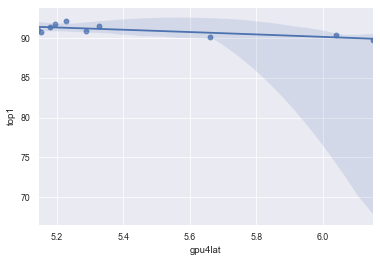

In [68]:
plot_top_n(df2, 'gpu4lat', 'acctgpu4lat', 10)

/Users/nielsescarfail/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


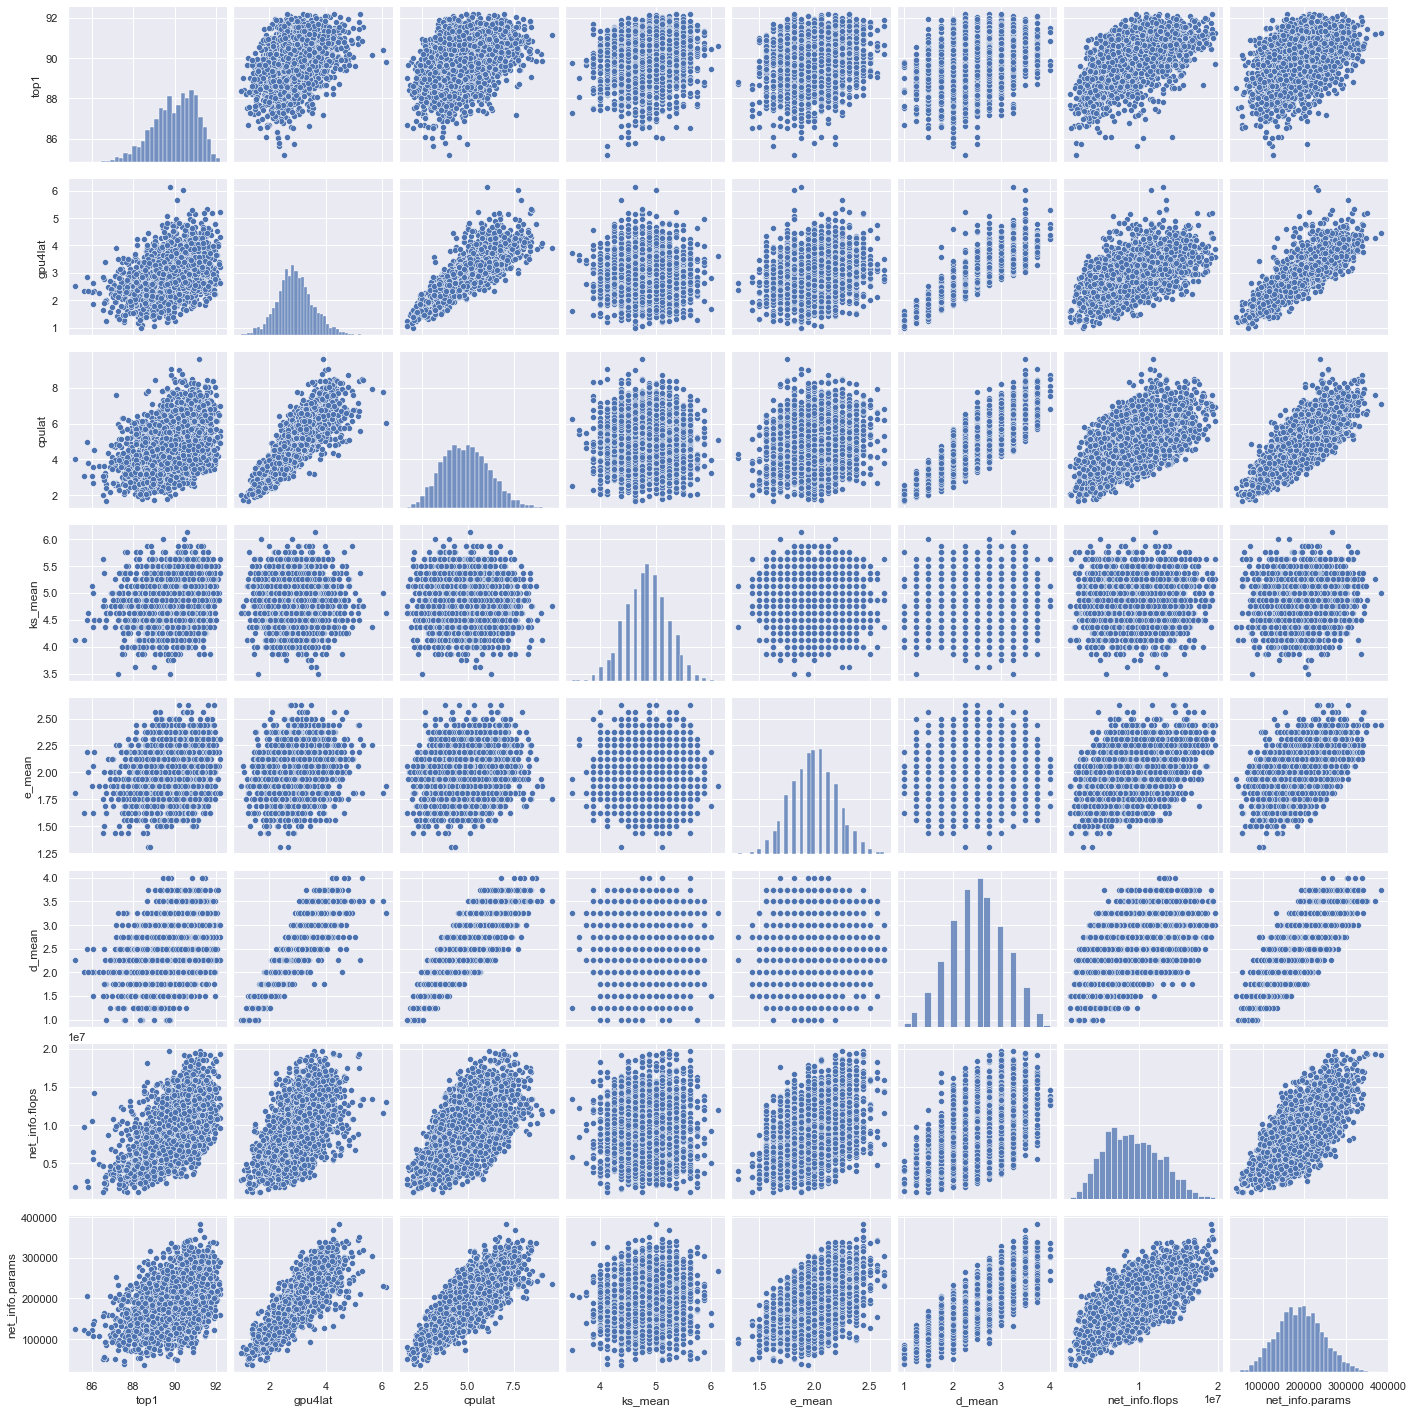

In [55]:
#scatterplot
sns.set()
cols = ['top1', 'gpu4lat', 'cpulat', 'ks_mean', 'e_mean', 'd_mean', 'net_info.flops', 'net_info.params']
sns.pairplot(df[cols], size = 2.5)
plt.show();

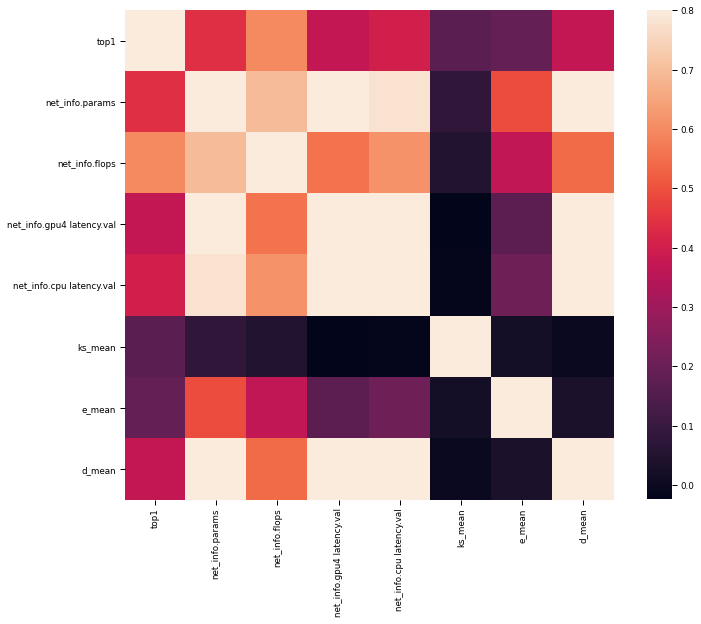

In [75]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

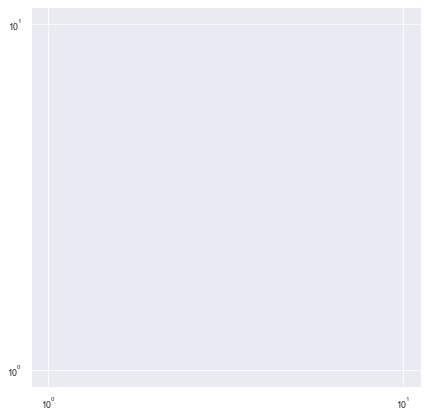

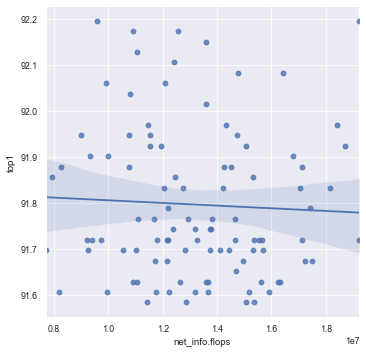

In [85]:
df = top_100
acc = df['top1']
flops = df['net_info.flops'] / 1e6
ks_mean = df['ks_mean']

val_vs_acc = 'net_info.flops' # 'net_info.params'# 'ks_mean' # 'net_info.flops'


y = 'top1' # , 'net_info.flops'
x = val_vs_acc

df_v = df[val_vs_acc]


sns.set_context("paper")
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.lmplot(x=x, y=y, data=pd.concat([df_v, acc], axis=1))


In [74]:
sns.boxplot(x=x, y=y, data=pd.concat([df_v, acc], axis=1), ax=ax)

/Users/nielsescarfail/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:373: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(-.5, len(self.plot_data) - .5, auto=None)


<AxesSubplot:xlabel='d_mean', ylabel='top1'>

In [30]:
# new df from the column of lists
split_df = pd.DataFrame(df['ks'].tolist())
# display the resulting df
split_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,3,3,3,3,3,3,3,3,7,7,3,3,3,3,7,5
1,3,3,3,3,3,3,3,5,7,5,7,7,5,3,5,7
2,3,3,3,3,3,3,3,7,5,5,5,7,5,3,5,3
3,3,3,3,3,3,3,5,3,3,3,7,3,5,5,3,3
4,3,3,3,3,3,3,5,3,5,5,5,7,3,5,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,3,5,3,7,5,3,3,3,7,7,7,3,3,7,3,7
1376,3,5,3,7,5,3,3,5,3,3,3,7,3,5,3,7
1377,3,5,3,7,5,3,3,5,3,7,5,5,3,7,7,7
1378,3,5,3,7,5,3,3,5,5,3,5,3,3,7,7,3


In [19]:
df['top1'].mean()

89.81433759674431